In [3]:
import glob
import os.path
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import scipy.io.wavfile

In [1]:
def readWAV(rawDataPath,files=None):
    ''' (names,data) = readWAV(rawDataPath). Reads the contents of the specified 
    directory for *.wav files, converts the files to arrays and returns a dictionary 
    containing the array data. 
    
    The keys for the dictionary are returned in the names list (the 
    filenames of the *.wav files).
    
    Input:
        rawDataPath - the directory where the wav files are stored.
        files (optional) - list of files to be loaded
    
    Output:
        names - a list of the dictionary keys to data.
        data - a dictionary containing the Nx2 arrays of the audio time series. 
    
    '''
    names = [];
    data = {};
    
    if not files:
        files = glob.glob(os.path.join(rawDataPath,"*.wav"))
        
        for name in files:
            fileName = os.path.basename(name).split(".")[0]
            names.append(fileName)
            print('Opening ' + fileName + ' ...')
            
            audioIn = scipy.io.wavfile.read(name);
            data[fileName] = audioIn[1];
    else:
        for fileName in files:
            print('Opening ' + fileName + ' ...')
            names.append(fileName)
            
            audioIn = scipy.io.wavfile.read(os.path.join(rawDataPath,fileName + ".wav"));
            data[fileName] = audioIn[1];
        
    return (names,data)
    
    
    
def getKeys(names,parts):
    ''' keys = getKeys(names,parts). Returns the entries in list filtered using the 
     set of name "parts" (Explained in detail below). Compares parts to 
     entries in provided list of names.
     
     Each key in names sould contain a set of identifiers separated by underscores.
     Format:
         AA_BB_CC_DDDD
         
         AA    - Camera type (GP=GoPro)
         BB    - Bent number (B1,B2,B3 = Bent 1,2,3)
         CC    - Location of camera on the bent (NL,NU,SL,SU = North/South Upper/Lower)
         DDDD  - Unique motion identifier (1A,1B,4,5,6,9A,9B,12,13,14A,S1,S2,S3,9C,
                 S4,S5,14B1,14B2,14C,15,16,17,18,19,20A,20B,21A,21B,21C)
                
     Input: 
         names - A list of data identifiers
         parts - A tuple of lists containing the three name part filters ([BB's],[CC's],[DDDD's]).
                 A value of None indicates that no filter will be applied for that name part.
                 i.e. (['B1'],None,['1A','16',...,'20A'])
                 
    Output:
        keys   - the entries in names that correspond to the provided filters
    '''

    keys = [];
    
    for name in names:
        [cType,bent,loc,motion] = name.split("_");
        if not parts[0]: #empty bent identifier
            if not parts[1]: #empty location identifier
                if not parts[2]: # empty motion identfier
                    keys.append(name)
                elif motion in parts[2]: # motions are input
                    keys.append(name) 
            elif loc in parts[1]: # locations are input
                if not parts[2]: # empty motion identfier
                    keys.append(name)
                elif motion in parts[2]: # motions are input
                    keys.append(name)
        elif bent in parts[0]:
            if not parts[1]: #empty location identifier
                if not parts[2]: # empty motion identfier
                    keys.append(name)
                elif motion in parts[2]: # motions are input
                    keys.append(name) 
            elif loc in parts[1]: # locations are input
                if not parts[2]: # empty motion identfier
                    keys.append(name)
                elif motion in parts[2]: # motions are input
                    keys.append(name) 
                    
    return keys
        
def loadSubset(data,names):
    ''' subset = loadSubset(data,names). Returns the subset of the input dictionary, data,
        specified by the key values given in names.
        
    Input: 
         data  - dictionary containing audio data.
         names - the dictionary keys for the subset data dictionary.
                 
    Output:
        subset - a new dictionary that contains only the specified keys.
    '''
    
    subset = {k: data[k] for k in names};
        
    return subset

In [ ]:
def localmaxmin(t,v,delta):

    #Initializes Table of Minima and Maxima:
    MaxTable = []
    MinTable = []
    #Initializes Local Min at +Infinity and Local Max at -Infinity:
    LocMin = np.Inf 
    LocMax = -np.Inf
    #Initializes Minimum and Maximum Positions
    MinPos = 0 
    MaxPos = 0
    #Initializes Counter which Allows Toggling Between Looking for Minima and Looking for Maxima:
    tog = 1

    for i in range(len(v)):
        #Defines the Current Value of v:
        cval = v[i]
        #Sets Current Value = LocMax if it is Greater than Existing Value of LocMax:
        if cval > LocMax:
            LocMax = cval
            MaxPos = t[i]
        #Sets Current Value = LocMin if it is Less than Existing Value of LocMax:
        if cval < LocMin: 
            LocMin = cval 
            MinPos = t[i]
      
        #Defines Algorithm for Determining Local Minima and Maxima:
        if tog != 0:
            #Finds Local Maximum if Current Value is Beyond Noise Threshold:
            if cval < LocMax-delta:
                #Appends Row to MaxTable:
                MaxTable.append([MaxPos,LocMax])
                #Resets LocMin to Current Value and MinPos to Current Time:
                LocMin = cval
                MinPos = t[i]
                #Method Found Local Maximum, so Toggle is Set to Next Find Local Minimum
                tog = 0;
        else:
            #Finds Local Minimum if Current Value is Beyond Noise Threshold:
                if cval > LocMin+delta:
                    #Appends Row to MinTable:
                    MinTable.append([MinPos,LocMin])
                    #Resets LocMax to Current Value and MaxPos to Current Time:
                    LocMax = cval 
                    MaxPos = t[i]
                    #Method Found Local Maximum, so Toggle is Set to Next Find Local Minimum
                    tog = 1;
                    
    return MaxTable, MinTable

In [4]:
#rawDataPath = os.path.join("..","rawData"); # directory where the audio fles reside
#print(rawDataPath)
rawDataPath = "C:\\Users\\Travis\\Dropbox\\EScience\\acoustical_monitoring\\rawData\\"
files = glob.glob("C:\\Users\\Travis\\Dropbox\\EScience\\acoustical_monitoring\\rawData\\*_18.wav")
print(files)
names = [];
        
for name in files:
    fileName = os.path.basename(name).split(".")[0]
    names.append(fileName)


filt = (['B1'],None,['18']) # 

audioFiles = getKeys(names,filt);

(names,cDataset) = readWAV(rawDataPath,audioFiles);

['C:\\Users\\Travis\\Dropbox\\EScience\\acoustical_monitoring\\rawData\\GP_B1_NL_18.wav', 'C:\\Users\\Travis\\Dropbox\\EScience\\acoustical_monitoring\\rawData\\GP_B1_NU_18.wav', 'C:\\Users\\Travis\\Dropbox\\EScience\\acoustical_monitoring\\rawData\\GP_B1_SL_18.wav', 'C:\\Users\\Travis\\Dropbox\\EScience\\acoustical_monitoring\\rawData\\GP_B1_SU_18.wav', 'C:\\Users\\Travis\\Dropbox\\EScience\\acoustical_monitoring\\rawData\\GP_B2_SL_18.wav', 'C:\\Users\\Travis\\Dropbox\\EScience\\acoustical_monitoring\\rawData\\GP_B2_SU_18.wav', 'C:\\Users\\Travis\\Dropbox\\EScience\\acoustical_monitoring\\rawData\\GP_B3_NL_18.wav', 'C:\\Users\\Travis\\Dropbox\\EScience\\acoustical_monitoring\\rawData\\GP_B3_NU_18.wav', 'C:\\Users\\Travis\\Dropbox\\EScience\\acoustical_monitoring\\rawData\\GP_B3_SL_18.wav', 'C:\\Users\\Travis\\Dropbox\\EScience\\acoustical_monitoring\\rawData\\GP_B3_SU_18.wav']
Opening GP_B1_NL_18 ...
Opening GP_B1_NU_18 ...
Opening GP_B1_SL_18 ...
Opening GP_B1_SU_18 ...


In [4]:
%matplotlib inline

In [ ]:
rawSignal = cDataset[audioFiles[0]][:,0]
Nsamp = len(rawSignal)
Nf = 24000; # Nyquist freqency in Hz
time = np.linspace(0,(1/Nf)*Nsamp,Nsamp)

In [ ]:
MaxTable, MinTable = localmaxmin(time,abs(rawSignal),1000); print(len(MaxTable))

In [ ]:

#a = np.array(MaxTable)

rawSignal = cDataset[audioFiles[0]][:,0]
downSamp1 = scipy.signal.decimate(rawSignal,4)
filtSignal1 = scipy.signal.medfilt(abs(downSamp),kernel_size=1201)
Nsamp = len(downSamp)
time = np.linspace(0,(4/Nf)*Nsamp,Nsamp)

plt.figure(figsize=(50,20))
plt.plot(time,filtSignal,'b')
#plt.plot(a[:,0],a[:,1],'r')
plt.draw()

In [ ]:
positiveSig = rawSignal**2/max(rawSignal**2)

In [ ]:
plt.figure(figsize=(50,20))
plt.plot(time,downSamp,'b')
plt.ylim([0,4000])
plt.draw()

In [ ]:
rawSignal = cDataset[audioFiles[1]][:,0]
downSamp2 = scipy.signal.decimate(rawSignal,4)
maxPeaks = scipy.signal.argrelmax()
filtSignal = scipy.signal.medfilt(abs(downSamp),kernel_size=601)
Nsamp = len(downSamp)
time = np.linspace(0,(4/Nf)*Nsamp,Nsamp)

plt.figure(figsize=(50,20))
plt.plot(time,filtSignal,'b')
#plt.plot(a[:,0],a[:,1],'r')
plt.draw()

In [ ]:
print(len(rawSignal))
print(len(downSamp))

In [ ]:
rawSignal = cDataset[audioFiles[1]][:,0]
downSamp2 = scipy.signal.decimate(rawSignal,4)
maxPeaks = scipy.signal.argrelmax(abs(downSamp), order=1200)
Nsamp = len(downSamp)
time = np.linspace(0,(4/Nf)*Nsamp,Nsamp)

plt.figure(figsize=(50,20))
#plt.plot(time,downSamp2,'b')
plt.plot(time[maxPeaks[0]],abs(downSamp2[maxPeaks[0]]),'r')
plt.draw()

In [ ]:
rawSignal = cDataset[audioFiles[0]][:,0]
downSamp2 = scipy.signal.decimate(rawSignal,4)
maxPeaks = scipy.signal.argrelmax(abs(downSamp2), order=600)
Nsamp = len(downSamp2)
time = np.linspace(0,(4/Nf)*Nsamp,Nsamp)

plt.figure(figsize=(50,20))
plt.plot(time,abs(downSamp2),'b')
plt.plot(time[maxPeaks[0]],abs(downSamp2[maxPeaks[0]]),'r')
plt.draw()

In [ ]:
signal1 = abs(scipy.signal.decimate(cDataset[audioFiles[0]][:,0],4))
signal2 = abs(scipy.signal.decimate(cDataset[audioFiles[1]][:,0],4))

Nf = 48000;

time1 = np.linspace(0,(4/Nf)*len(signal1),len(signal1))
time2 = np.linspace(0,(4/Nf)*len(signal2),len(signal2))

area1 = scipy.integrate.simps(signal1,time1)
area2 = scipy.integrate.simps(signal2,time2)

peaks1 = scipy.signal.argrelmax(signal1, order=120)
peaks2 = scipy.signal.argrelmax(signal2, order=120)

f1 = scipy.interpolate.interp1d(time1[peaks1[0]],signal1[peaks1[0]]/area1)
f2 = scipy.interpolate.interp1d(time2[peaks2[0]],signal2[peaks2[0]]/area2)


time = np.linspace(1,90, num= 89*12000 ,endpoint=True)
corr = np.correlate(f1(time),f2(time),mode='same')


plt.figure(figsize=(50,20))
plt.plot(time1[peaks1[0]],signal1[peaks1[0]]/area1,'b')
plt.plot(time2[peaks2[0]],signal2[peaks2[0]]/area2,'r')
plt.xlim([25,40])
plt.ylim([0,0.2])
plt.draw()

plt.figure(figsize=(50,20))
plt.plot(time,corr,'b')
plt.draw()

In [ ]:
print(min(f2.x))
print(max(f2.x))
t = np.linspace(1,90, num= 100*48000/4 ,endpoint=True)

print(len(f2(t)))
print(len(f1(t)))

In [ ]:
rawDataPath = rawDataPath = "C:\\Users\\Travis\\Dropbox\\EScience\\acoustical_monitoring\\rawData\\"

files = glob.glob(os.path.join(rawDataPath,"*.wav"))
names = [];
        
for name in files:
    fileName = os.path.basename(name).split(".")[0]
    names.append(fileName)


filt = (None,None,['17']) # 

audioFiles = pp.getKeys(names,filt);

(names,cDataset) = pp.readWAV(rawDataPath,audioFiles); # opens files and writes to a dictionary

Nf = 24000; # Nyquist freqency in Hz
Fpass = [3200/Nf,3300/Nf]
Fstop = [3100/Nf,3400/Nf]

N, Wn = scipy.signal.ellipord(Fpass,Fstop , 1, 60, False)
b, a = scipy.signal.ellip(N, 1, 60, Wn, 'bandpass')
w, h = scipy.signal.freqs(b, a, np.logspace(-4, 4, 500))

t = np.ones(Nf);



plt.figure(figsize=(50,20))

for ii in range(len(cDataset)):
    
    
    rawSignal = cDataset[audioFiles[ii]][:,0]
    filteredSignal = scipy.signal.filtfilt(b,a,rawSignal,padlen=150)
    Nsamp = len(rawSignal)
    
    N, Wn = scipy.signal.ellipord(200/Nf,250/Nf , 1, 60, False)
    b2, a2 = scipy.signal.ellip(N, 1, 60, Wn, 'lowpass')
    smoothedSignal = scipy.signal.filtfilt(b2,a2,filteredSignal**2,padlen=150)
    
    #y= np.convolve(filteredSignal,t,'valid')
    #Ncon = len(y)
    
    time = np.linspace(0,(1/Nf)*Nsamp,Nsamp)
    
    #plt.plot(np.linspace(0,(1/Nf)*Ncon,Ncon),y,'b')
    plt.plot(time,filteredSignal/np.max(filteredSignal),'b')
    plt.plot(time,np.cumsum(smoothedSignal)/np.max(np.cumsum(smoothedSignal)),'r')
    plt.plot(time,np.cumsum(smoothedSignal)/np.max(np.cumsum(smoothedSignal))>0.04,'g')
    plt.xlim([50,80])    
    plt.draw()

In [5]:
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2, fftshift
 
def cross_correlation_using_fft(x, y):
    f1 = fft(x)
    f2 = fft(np.flipud(y))
    cc = np.real(ifft(f1 * f2))
    return fftshift(cc)
 
# shift &lt; 0 means that y starts 'shift' time steps before x # shift &gt; 0 means that y starts 'shift' time steps after x
def compute_shift(x, y):
    assert len(x) == len(y)
    c = cross_correlation_using_fft(x, y)
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    return shift



In [11]:
signal1 = abs(scipy.signal.decimate(cDataset[audioFiles[0]][:,0],4))
signal2 = abs(scipy.signal.decimate(cDataset[audioFiles[2]][:,0],4))

Ndiff = len(signal1) - len(signal2)
Nf = 48000

if Ndiff > 0:
    signal1 = signal1[0:len(signal2)]
    time = np.linspace(0,(4/Nf)*len(signal1),len(signal1))
else:
    signal2 = signal2[0:len(signal1)]
    time = np.linspace(0,(4/Nf)*len(signal2),len(signal2))
    


-0.00325


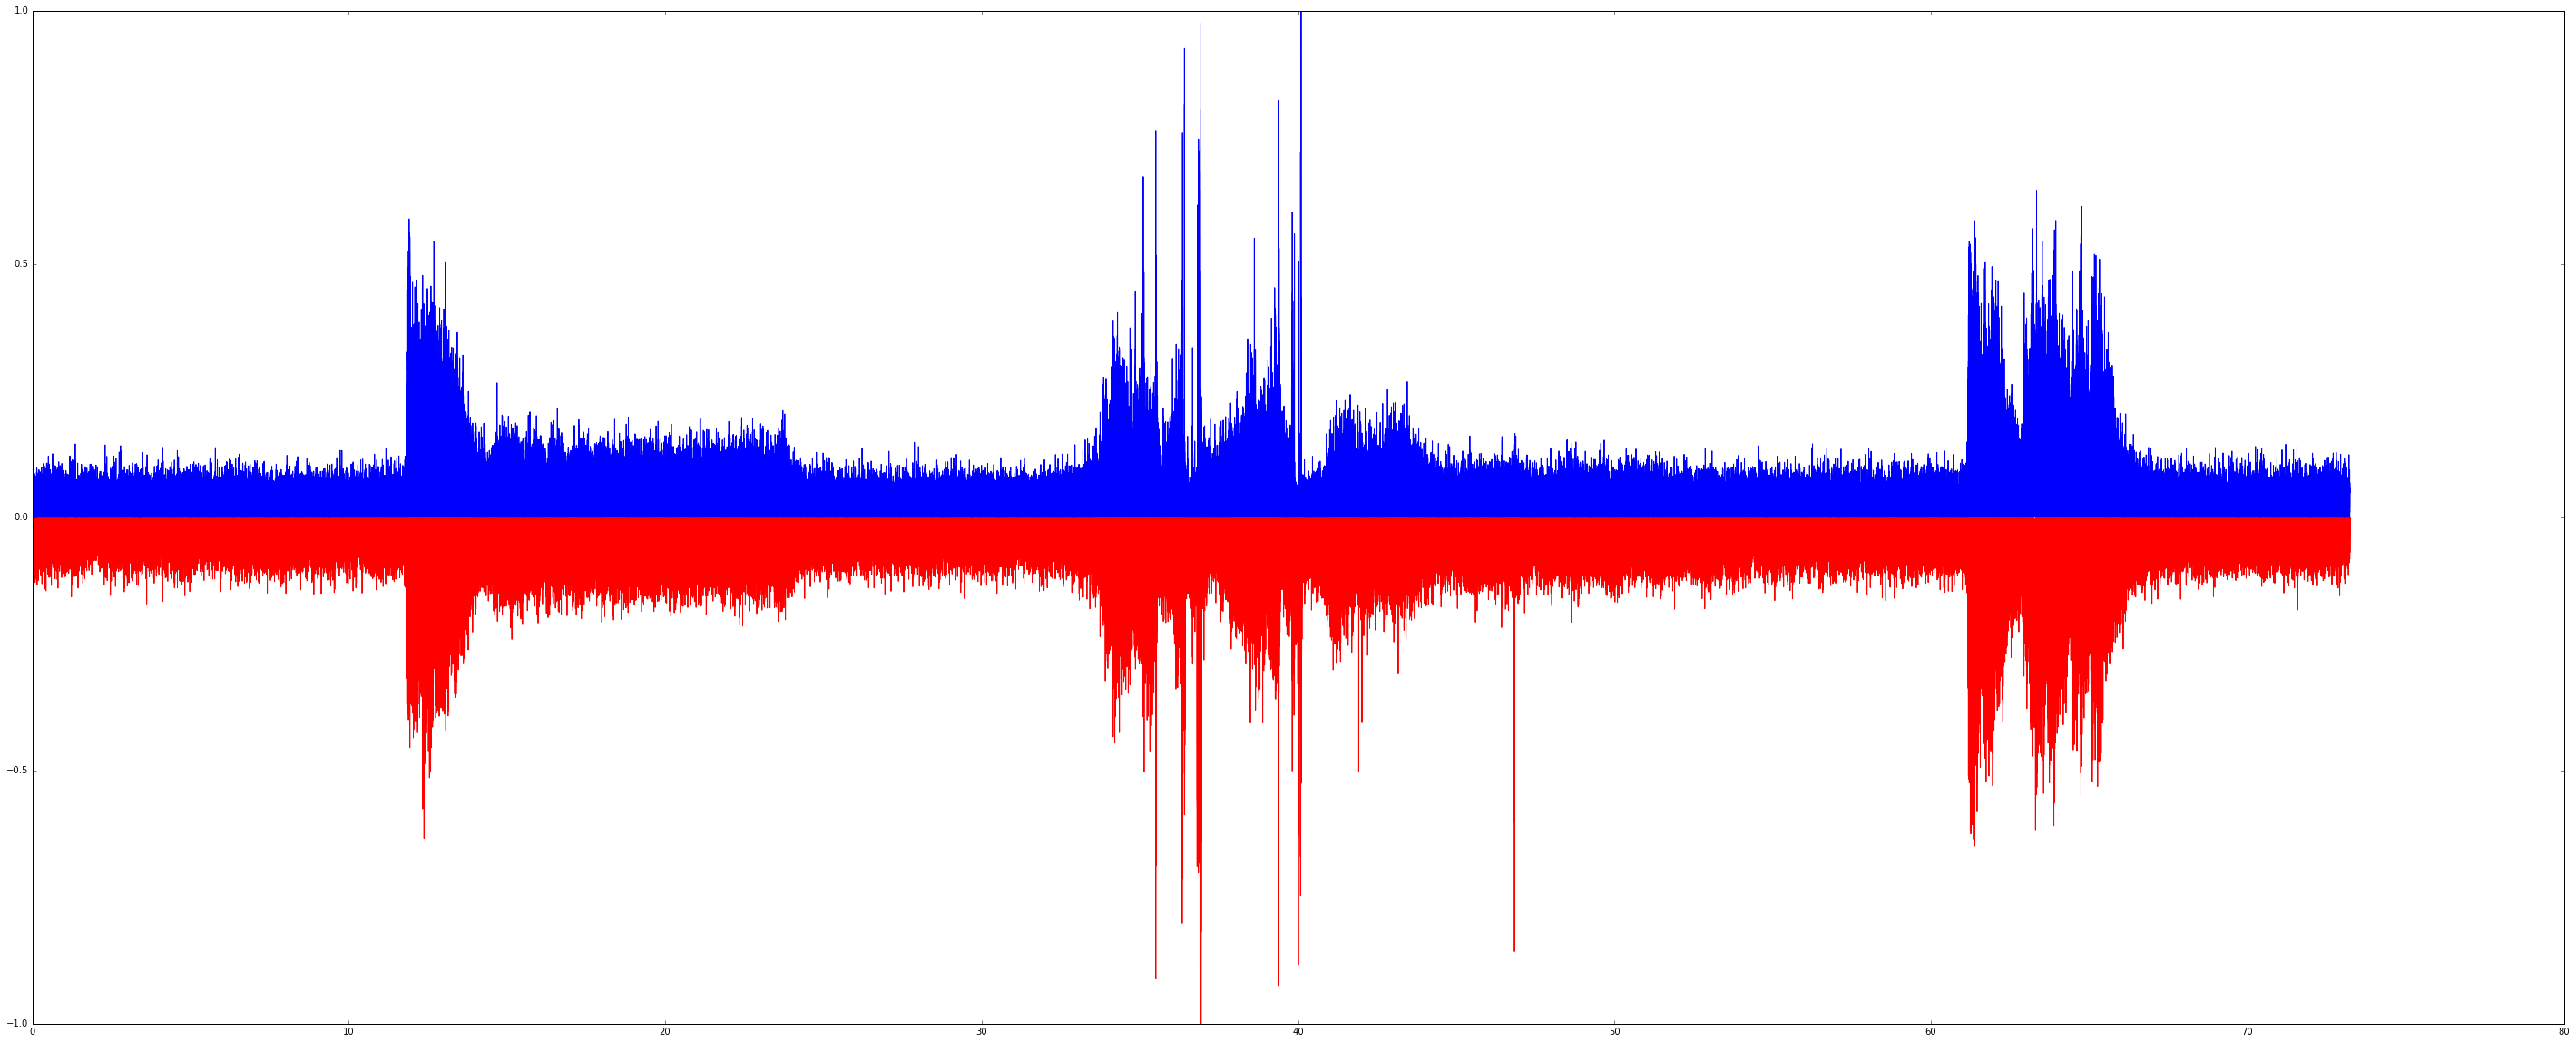

In [12]:
shift = compute_shift(signal1,signal2)
print(4*shift/Nf)

plt.figure(figsize=(50,20))
plt.plot(time-4*shift/Nf,-signal2/max(signal2),'r')
plt.plot(time,signal1/max(signal1),'b')
#plt.xlim([50,100])    
#plt.ylim([0,40000])
plt.draw()

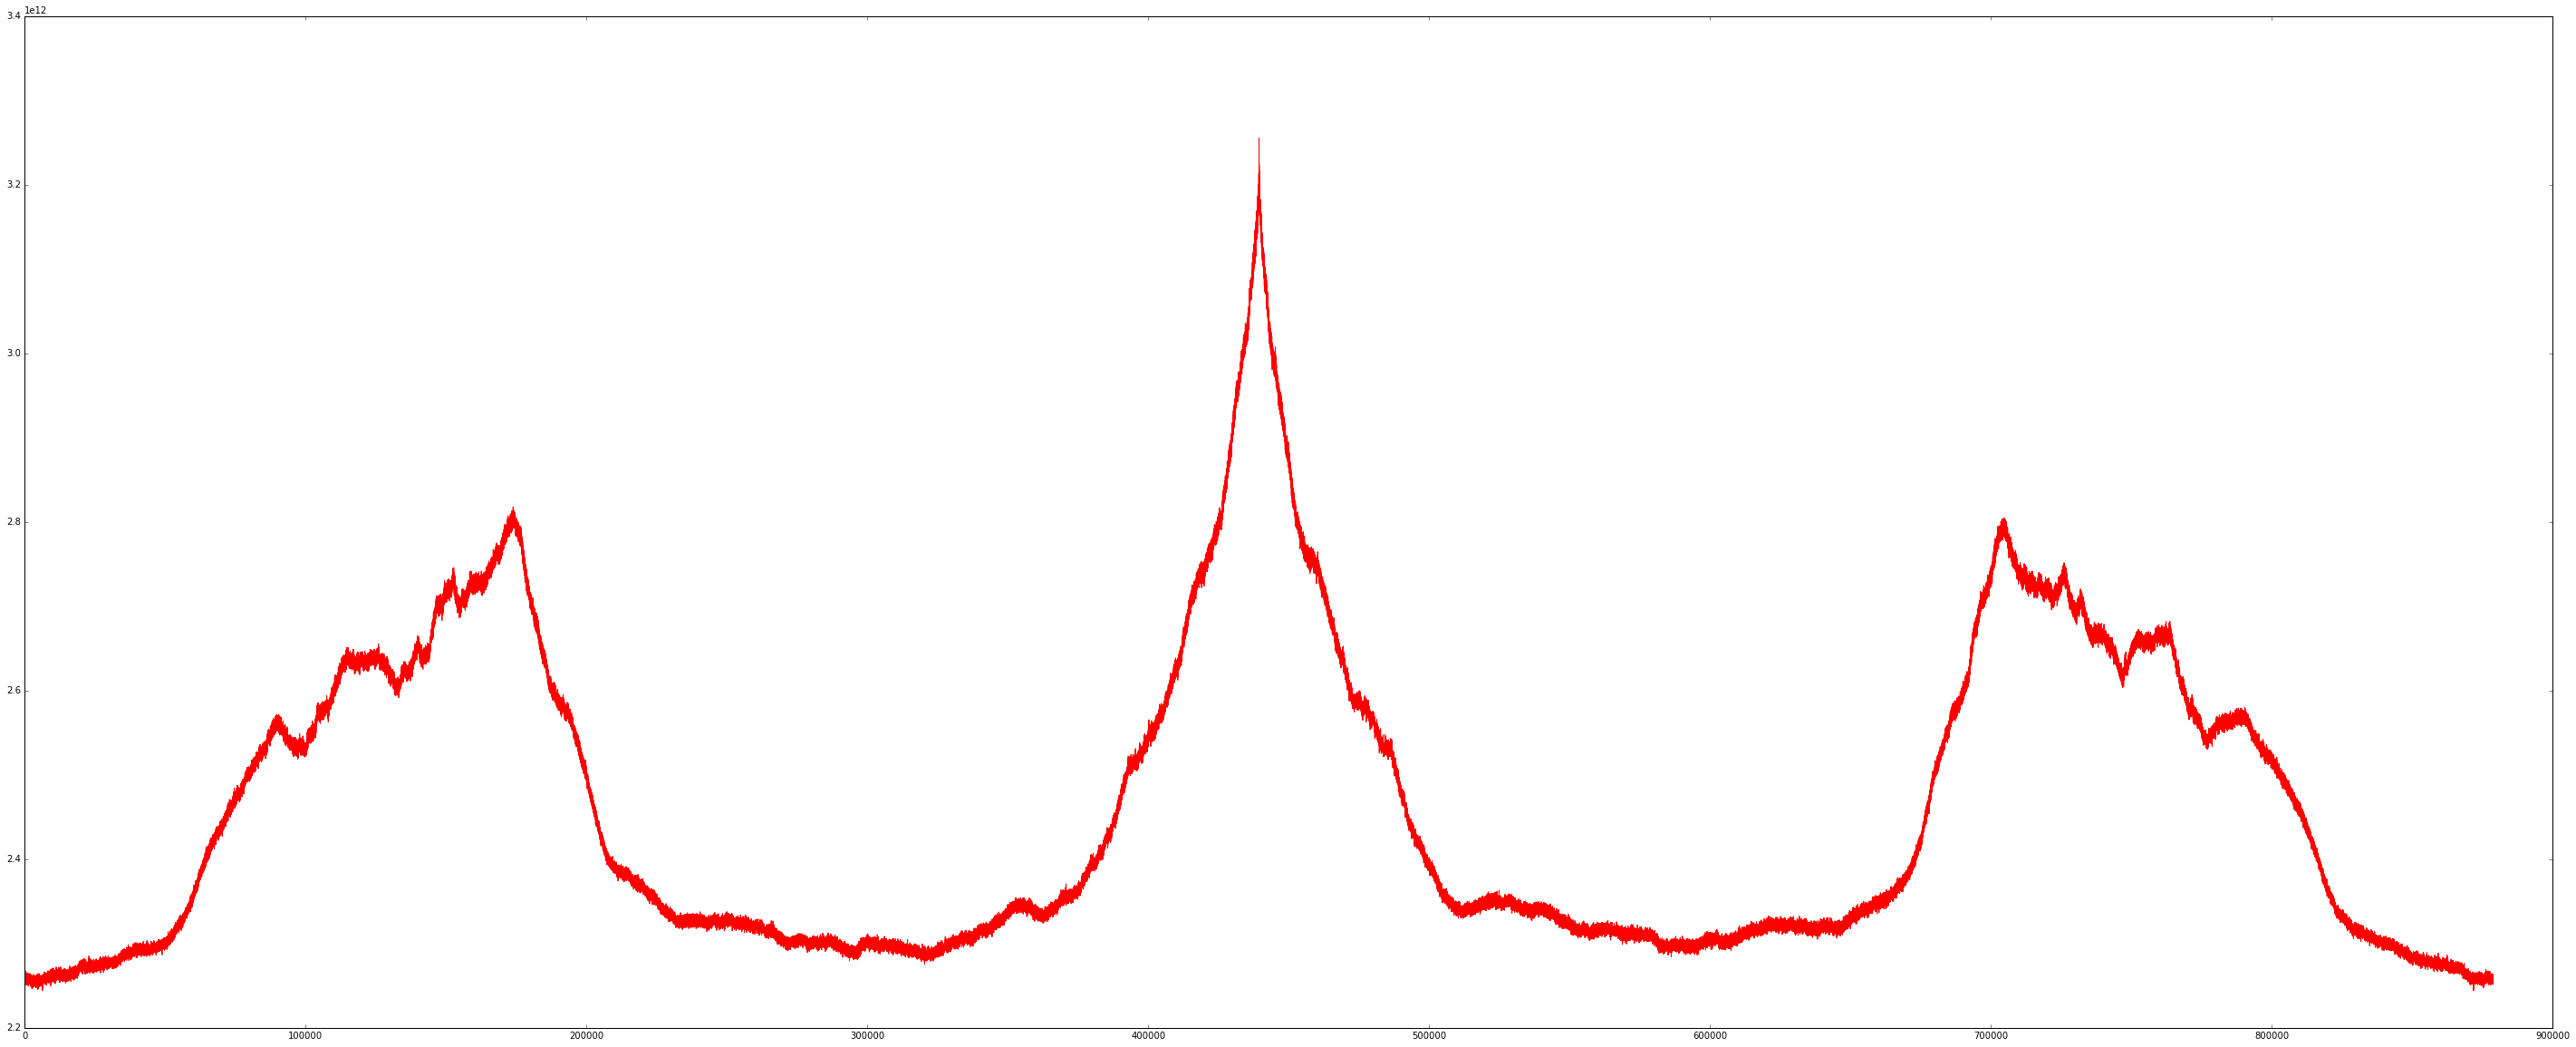

In [13]:
cc = cross_correlation_using_fft(signal1,signal2)
plt.figure(figsize=(50,20))
plt.plot(cc,'r')

In [ ]:
print(len(signal1)/2-1)
print(np.argmax(cc))
len(signal1)/2-1-np.argmax(cc)